In [1]:
import datetime
import os
from mdagent import MDAgent

In [2]:
prompt15 = "Simulate trypsin (1TRN) for 1 ns at 300 K and plot energy over time. Compute SASA, RMSF, and radius of gyration. Get the subunit structure, sequence, active and binding sites."
llm_var = "accounts/fireworks/models/llama-v3p1-70b-instruct"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-10-10
time: 01:31:57
LLM:  accounts/fireworks/models/llama-v3p1-70b-instruct 
Temperature:  0.1


In [3]:
answer = agent.run(prompt15)

Thought:

 To simulate trypsin (1TRN) for

 1 ns at 300 K and plot energy over time

, I need

 to set up

 and run

 a molecular dynamics simulation. I

 will use the SetUpand

RunFunction tool to set up the simulation and then use

 the

 PostSimulationFigures tool to

 plot the energy over time. Additionally

, I will use various other

 tools to compute SASA, RMSF,

 and radius of gyration, as well as to get

 the subunit structure, sequence, active and binding sites.



Action:
```
{
  "action": "SetUpand

RunFunction",
  "action_input": {
   

 "pdb_id": "1TRN",
    "force

field_files": ["amber99

sbildn.xml", "tip3

p.xml"],
    "save": true,


    "system_params": {
      "nonbond

edMethod": "PME",
      "non

bondedCutoff": "1.0 * nan

ometers",
      "ewaldErrorTolerance": 0

.00001,


      "constraints":

 "HBonds",


      "rigid

Water": true,


      "constraintT

olerance": 0.00001,
      "solv

ate": true
    },
    "integrator

_params": {
      "integrator_type": "L

angevinMiddle",


      "Temperature": "300 * kel

vin",
      "Friction": "1.0 /

 picoseconds",
      "Timestep": "0.002

 * picoseconds",


      "Pressure":

 "1.0 * bar"
    },
    "simulation

_params": {
      "Ensemble": "NPT",


      "Number of Steps": 500

000,
      "record_interval_steps": 100,
      "record_params": ["step", "potentialEnergy", "temperature"]
    }
  }
}
```


Thought:

 I need to download the PDB file for

 trypsin (1TRN) and get its

 file ID

 to use in the SetUpand

RunFunction tool.



Action

:
```
{
  "action": "PDBFile

Downloader",
  "action_input": {
    "query":

 "1TRN"
  }
}
```



PDB file found with this ID: 1TRN


Thought:

 Now that I have the file ID for the P

DB file, I can use it to set up and run

 the molecular dynamics simulation using the SetUpandRunFunction

 tool.

Action:
```
{
  "action": "

SetUpandRunFunction",
  "action_input": {
   

 "pdb_id": "1TRN_013207",


    "forcefield_files": ["amber

99sbildn.xml", "tip3p.xml"],


    "save": true,
    "system_params": {


      "nonbondedMethod": "PME",
     

 "nonbondedCutoff": "1.0 *

 nanometers",
      "ewaldErrorTolerance": 

0.00001,
      "constraints": "HBonds

",
      "rigidWater": true,
      "constraint

Tolerance": 0.00001,
      "s

olvate": true
    },
    "integrator_params

": {
      "

integrator_type": "LangevinMiddle",
      "

Temperature": "300 * kelvin",
      "Friction

": "1.0 / picoseconds",
      "T

imestep": "0.002 * picoseconds",
      "

Pressure": "1.0 * bar

"
    },
    "simulation_params":

 {
      "Ensemble": "NPT",
      "

Number of Steps": 500000,
      "record_interval

_steps": 100,
      "record_params": ["step

", "potentialEnergy", "temperature"]
    }
  }


}
```

Building system...


About to create system...
Attempts at creating system: 0/3
Error adding solvent ValueError – No template found for residue 1 (ILE).  The set of atoms is similar to HID, but it is missing 9 atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template
Residue code: ILE
Residue code not in solvent list. Adding forcefield                         not supported.


Thought:

 The SetUpand

RunFunction tool failed

 because it couldn't find a template for

 residue 1 (ILE) in the force field

 files. This is likely because

 the residue is not in

 the standard amino acid

 set. I need

 to

 clean the PDB

 file to replace non-standard residues

 with standard ones.

Action:
```
{
  "action

": "CleaningToolFunction",
  "action_input": {


    "pdb_id": "1TRN_013207

",
    "replace_nonstandard_resid

ues": true,
    "add_missing_atoms": true,


    "remove_heterogens": true,
    "remove

_water": true,
    "add_hydrogens": true

,
    "add_hydrogens_ph": 7.

0
  }
}
```


file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_4/pdb/1TRN_raw_20241010_013207.pdb


Thought:

 Now that the PDB file has been

 cleaned, I can use the cleaned file ID

 to set up and run the molecular dynamics simulation using the SetUp

andRunFunction tool.

Action:
```
{
  "

action": "SetUpandRunFunction",
  "action_input

": {
    "pdb_id": "

1TRN_013217",
    "forcefield_files

": ["amber99sbildn.xml", "tip3

p.xml"],
    "save": true,
    "system

_params": {
      "nonbondedMethod": "P

ME",
      "nonbondedCutoff": "1

.0 * nanometers",
      "ewaldErrorT

olerance": 0.00001,
      "constraints": "HBonds",


      "rigidWater": true,
      "constraintTolerance": 0

.00001,
      "solvate": true
    },
    "

integrator_params": {
      "integrator_type": "LangevinMiddle

",
      "Temperature": "300 * kelvin",
     

 "Friction": "1.0 / picoseconds",


      "Timestep": "0.002 * picoseconds

",
      "Pressure

": "1.0 * bar"
    },
    "

simulation_params": {
      "Ensemble

": "NPT",
      "Number of Steps": 

500000,
      "record_interval_steps": 100,


      "record_params": ["step", "potentialEnergy",

 "temperature"]
    }
  }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b8c9a376970> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...


Minimization complete!


Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_4/simulations/NPT_1TRN_013217_20241010_013219.py
['LOG_sim0_210717_1XQ8_210713_20241008_210823.txt', 'exp_15_output3.ipynb', 'exp_10.ipynb', 'TOP_sim0_184224_1TRN_184223_20241009_184231.pdb', 'exp_13.ipynb', 'exp_22.ipynb', 'exp_8.ipynb', 'TOP_sim0_012744_1XQ8_012742_20241010_012930.pdb', 'exp14.sh', 'TRAJ_sim0_012744_1XQ8_012742_20241010_012930.dcd', 'TOP_sim0_210717_1XQ8_210713_20241008_210823.pdb', 'exp_3.ipynb', 'TRAJ_sim0_210309_1TRN_210307_20241008_210316.dcd', 'exp_17.ipynb', 'exp_1.ipynb', '.ipynb_checkpoints', 'out.exp5_70b', 'LOG_sim0_013219_1TRN_013217_20241010_013231.txt', 'TRAJ_sim0_210717_1XQ8_210713_20241008_210823.dcd', 'exp_15_output.ipynb', 'exp_4.ipynb', 'exp_24.ipynb', 'out.exp12_70b', 'exp_15-newprompt.ipynb', 'LOG_sim0_184224_1TRN_184223_20241009_184231.txt', 'exp12.sh', 'exp_12.ipynb', 'LOG_sim0_210309_1TRN_210307_20241008_210316.txt', 'LOG_sim0_012744_1XQ8_012742_20

Thought:

 Now that

 the simulation is done, I can use

 the PostSimulationFigures tool to

 plot the energy over time.

Action:
```
{


  "action": "PostSimulationFig

ures",
  "action_input": {
    "file_id

": "rec0_013231"
 

 }
}
```


Thought:

 The PostSimulationFigures tool failed

 because it couldn't decode the

 file. This is likely because the

 file is not in the

 correct format. I need to check the file format and try

 again.



Action:
```
{
  "action

": "ListRegistryPaths",
  "

action_input": {
    "paths":

 "paths"
  }
}
``

`


Thought:

 I need

 to compute SASA, RMSF

, and radius of gyration

 for the simulation.

 I will use the Sol

ventAccessibleSurfaceArea,

 ComputeR

MSF, and Radiusof

GyrationAverage tools to compute

 these values.

Action:
```
{


  "action": "Solvent

AccessibleSurfaceArea",
  "action_input

": {
    "top_fileid":

 "top_sim0

_013219",
    "traj

_fileid": "rec0_013231"
 

 }
}
```


Loading trajectory ...


Calcuating SASA ...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_4/records/sasa_sim0_013219.csv


SASA plot saved to FIG_sasa_sim0_013219_20241012_112950.png


Thought:

 Now that

 I have computed SAS

A, I will compute RMSF.

Action

:
```
{
  "action": "ComputeRMS

F",
  "action_input": {
    "top_id

": "top_sim0_013219",


    "traj_id": "rec0_013231",
    "ref

_top_id": "top_sim0_013219",
   

 "ref_traj_id": "rec0_013231",


    "select": "protein",
    "mol_name":

 "1TRN_013217"
  }
}


```

Calculating RMSF...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_4/records/rmsf_1TRN_013217.csv


Plot saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_4/figures/FIG_rmsf_1TRN_013217_20241012_113025.png


Thought:

 Now that

 I have computed RMSF, I will compute

 the radius of gyration.

Action:
```


{
  "action": "RadiusofGyrationAverage",


  "action_input

": {
    "traj_file": "rec0

_013231",
    "top_file": "top_sim

0_013219"
  }
}
```


Thought:

 Now that I have computed the radius

 of gyration, I will get the subunit structure,

 sequence, active and binding sites for the protein

.

Action:
```
{
  "action":

 "GetSubunit

Structure",
  "action_input": {
    "query":

 "1TRN",
    "primary_access

ion": "P00760

"
  }
}
```


The primary accession number provided does not match any entry in the data, using the first entry instead.
No subunit structure information found.


Thought:

 It seems that the GetSub

unitStructure tool did not return any results.

 This is likely because the primary accession number "P007

60" is not correct for the protein 1

TRN. I need to find the correct primary accession

 number for the protein.

Action:
```
{
  "

action": "UniprotID2Name

",
  "action_input": {
    "query": "

1TRN",
    "all_ids

": true
  }
}
```

TypeError: UniprotID2Name._run() got an unexpected keyword argument 'all_ids'

In [2]:
agent = MDAgent(ckpt_dir="ckpt_4")
registry = agent.path_registry
print('ckpt_dir:',os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_4
Files found in registry: 1TRN_013207: PDB file downloaded from RSCB
 PDBFile ID: 1TRN_013207
 1TRN_013217: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_013219: Initial positions for simulation sim0_013219
 sim0_013219: Basic Simulation of Protein 1TRN_013217
 rec0_013231: Simulation trajectory for protein 1TRN_013217 and simulation sim0_013219
 rec1_013231: Simulation state log for protein 1TRN_013217 and simulation sim0_013219
 rec2_013231: Simulation pdb frames for protein 1TRN_013217 and simulation sim0_013219
 sasa_sim0_013219: Total SASA values for sim0_013219
 fig0_112950: Plot of SASA over time for sim0_013219
 rmsf_1TRN_013217: RMSF for 1TRN_013217
 fig0_113025: RMSF plot for 1TRN_013217
 rgy_rec0_013231: Radii of gyration per frame for rec0_013231


In [6]:
import re
import os

match = re.search(r"rec0_\d+", paths_and_descriptions)
traj_id = match.group(0)
traj_path = registry.get_mapped_path(traj_id)

match = re.search(r"top_sim0_\d+", paths_and_descriptions)
top_id = match.group(0)
top_path = registry.get_mapped_path(top_id)



matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_id2 = matches[1]
#fig_id3 = matches[2]
fig_path1 = registry.get_mapped_path(fig_id1)
fig_path2 = registry.get_mapped_path(fig_id2)
#fig_path3 = registry.get_mapped_path(fig_id3)


assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(fig_path)
print(f'It is asserted that file paths for {traj_id}, {top_id}, {fig_id1} and {fig_id2} exist')

It is asserted that file paths for rec0_013231, top_sim0_013219, fig0_112950 and fig0_113025 exist


Number of frames:  5010


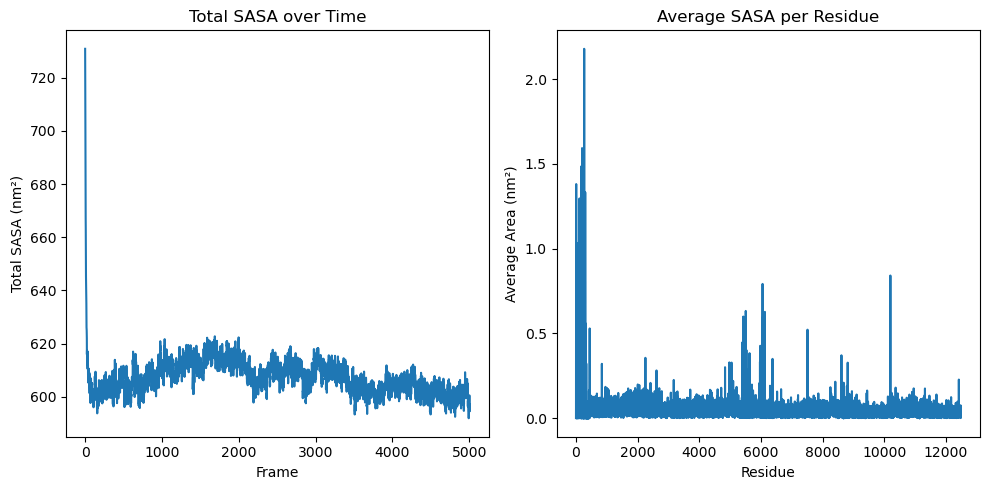

In [7]:
import mdtraj as md
from IPython.display import Image
#print number of frames adn residues:
traj = md.load(traj_path, top=top_path)

print("Number of frames: ", traj.n_frames)
Image(filename=fig_path1)

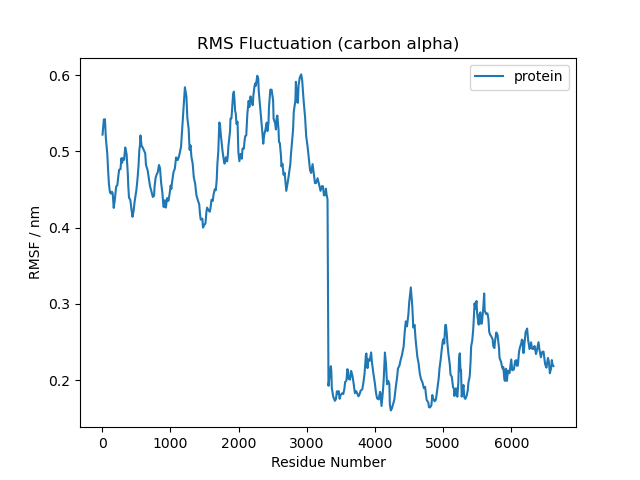

In [8]:
Image(filename=fig_path2)

In [19]:
# since no RGy plot was made, checking RGy file
match = re.search(r"rgy_rec0_\d+", paths_and_descriptions)
rgy_id = match.group(0)
rgy_path = registry.get_mapped_path(rgy_id)

with open(rgy_path, "r") as f:
    lines = f.read().split('\n')
    for line in lines:
        print(line)

# Radius of Gyration (nm)
4.542444486989671404e+00
4.538414766200434158e+00
4.526122272186335671e+00
4.518663216823669337e+00
4.513872176262787583e+00
4.501175061981777858e+00
4.500847973516229672e+00
4.499833633464939808e+00
4.495647145448965709e+00
4.484694911768039916e+00
4.482727607794035229e+00
4.483394204399273164e+00
4.485513214380291380e+00
4.486901407593720137e+00
4.485321394660390482e+00
4.484209059064997227e+00
4.480741860444486413e+00
4.481196707669172774e+00
4.473062618692757120e+00
4.473013416570014833e+00
4.473302200286289221e+00
4.471935742771499633e+00
4.468505291969249171e+00
4.469002846519951611e+00
4.469161879394826009e+00
4.468822823589491122e+00
4.468006553681658666e+00
4.465427674465535901e+00
4.465300675883510984e+00
4.464406172424452812e+00
4.461978578286576180e+00
4.460612665386431530e+00
4.460542827550496803e+00
4.460658684947384600e+00
4.461077472086271811e+00
4.461163733186259250e+00
4.458899038103675494e+00
4.458752375820327352e+00
4.450155367181504396e+00